In [1]:
# Import pandas for data analysis, stats for working with distributions, and matplotlib for graphing
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv("student-mat.csv", sep=";")

# Set variables for the groups we are going to study
all_students = data['G3']
romantic_yes = data[data['romantic'] == 'yes']['G3'] # Students in a romantic relationship
romantic_no = data[data['romantic'] == 'no']['G3'] # Students not in a relationship

In [5]:
# Prints the sample size, mean, standard deviation, median, mode and range of a column from a dataframe
def print_desc_stats(df):
    print("Descriptive stats for final grade")
    print("Sample:", df.shape[0])
    print("Mean:", df.mean()) 
    print("Standard Deviation:", df.std())
    print("Median:", df.median())
    print("Mode:", df.mode()[0])
    print("Range: [", df.min(), ",", df.max(), "]")
    
# Print them for our groups of interest
print_desc_stats(all_students)
print_desc_stats(romantic_yes)
print_desc_stats(romantic_no)

Descriptive stats for final grade
Sample: 395
Mean: 10.415189873417722
Standard Deviation: 4.5814426109978434
Median: 11.0
Mode: 10
Range: [ 0 , 20 ]
Descriptive stats for final grade
Sample: 132
Mean: 9.575757575757576
Standard Deviation: 4.856916390702853
Median: 11.0
Mode: 0
Range: [ 0 , 18 ]
Descriptive stats for final grade
Sample: 263
Mean: 10.836501901140684
Standard Deviation: 4.385946319915415
Median: 11.0
Mode: 10
Range: [ 0 , 20 ]


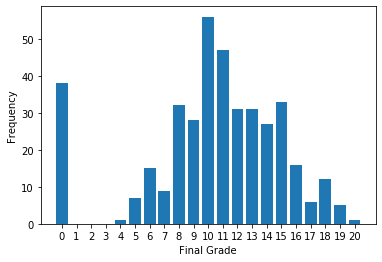

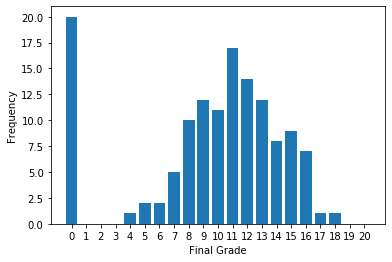

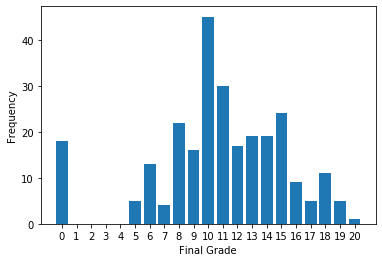

In [43]:
# Creates graphs of the distribution of grades
def print_bar_chart(df, xvalues):
    yvalues = []
    for i in xvalues: # count how many instances of every grade we have
        yvalues.append(df[df == i].shape[0])
    plt.bar(xvalues, yvalues)
    plt.xticks(xvalues)
    plt.ylabel("Frequency")
    plt.xlabel("Final Grade")
    plt.show()
        
print_bar_chart(all_students, list(range(0,21)))
print_bar_chart(romantic_yes, list(range(0,21)))
print_bar_chart(romantic_no, list(range(0,21)))

In [14]:
#Constructs a two-sided confidence interval for the mean of a given dataset
def confidence_interval(df, alpha):
    # Calculate standard deviation, mean, sample size, standard error
    std = df.std()
    mean = df.mean()
    n = df.shape[0]
    SE = std / n**0.5
    # Find the t value (a.k.a. sigma)
    sigma = stats.t.ppf(1 - alpha / 2, n)
    # Find lower and upper bounds
    low = mean - SE * sigma
    high = mean + SE * sigma
    return low, high

#Find confidence intervals for all students' final grades
print(confidence_interval(all_students, 0.05))

(9.961995472083377, 10.868384274752067)


In [3]:
# Performs hypothesis testing for two-tailed difference in means between two groups
def test_hypothesis_means_diff(group1, group2):
    s1 = group1.std() #standard deviation
    s2 = group2.std()
    n1 = group1.shape[0] # Sample size
    n2 = group2.shape[0]
    n = min(n2 - 1, n1 - 1) # degrees of freedom for using the t distribution
    diff_SE = ((s1**2 / n1) + (s2**2 / n2))**0.5 # Standard error for difference between means
    diff_means = group1.mean() - group2.mean() # Difference betweem means
    t = diff_means / diff_SE # t value
    p = stats.t.cdf(t, n) * 2 # p value
    return p

# Perform this test for students who are in a relationship and those who are not
print(test_hypothesis_means_diff(romantic_yes, romantic_no))

0.013212372420117866


In [4]:
# Calculates Cohen's d for difference of means
def cohens_d(group1, group2):
    s1 = group1.std() #standard deviation
    s2 = group2.std()
    n1 = group1.shape[0] # Sample size
    n2 = group2.shape[0]
    diff_means = group1.mean() - group2.mean() # Difference betweem means
    s = ((((n1 - 1) * s1**2) + ((n2 - 1) * s2**2)) / (n1 + n2))**0.5 # Pooled standard deviation
    d = diff_means / s # Cohen's d
    return d

# Perform this test for students who are in a relationship and those who are not
print(cohens_d(romantic_yes, romantic_no))

-0.27789109791176436
